# Importing


In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception, DenseNet121, ResNet50
from tensorflow.keras import layers, models , optimizers
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import label_binarize

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Extract Dataset

In [2]:
train_dir = "D:\\Computer Science And Artificial Intelegence Helwan University\\4th year\\1st term\\DL&NN\\Project\\context_virus_RAW\\train"
test_dir = "D:\\Computer Science And Artificial Intelegence Helwan University\\4th year\\1st term\\DL&NN\\Project\\context_virus_RAW\\test"

# Parameters
IMG_HEIGHT, IMG_WIDTH = 128, 128
BATCH_SIZE = 64
EPOCHS = 20
LEARNING_RATE = 0.001

# Data Preparation

In [3]:
# Data loading and augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = data_gen.flow_from_directory(
    "D:\\Computer Science And Artificial Intelegence Helwan University\\4th year\\1st term\\DL&NN\\Project\\context_virus_RAW\\train",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    # class_mode='categorical',
    subset='training'
)

val_generator = data_gen.flow_from_directory(
    "D:\\Computer Science And Artificial Intelegence Helwan University\\4th year\\1st term\\DL&NN\\Project\\context_virus_RAW\\validation",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    # class_mode='categorical',
    subset='validation'
)

test_generator = data_gen.flow_from_directory(
    "D:\\Computer Science And Artificial Intelegence Helwan University\\4th year\\1st term\\DL&NN\\Project\\context_virus_RAW\\test",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    # class_mode='categorical',
    shuffle=False
)

num_classes = train_generator.num_classes

Found 603 images belonging to 22 classes.
Found 41 images belonging to 22 classes.
Found 252 images belonging to 22 classes.


# Define Function for Visualization

In [4]:
def plot_metrics(history, model_name):
    plt.figure(figsize=(12, 4))
    
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()

    plt.show()

# Transfer Model

In [6]:
# Transfer Learning Models (Xception and DenseNet121)
def build_transfer_model(base_model, num_classes):
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Train Xception

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.1068 - loss: 2.9643 - val_accuracy: 0.1463 - val_loss: 2.9914
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.3271 - loss: 2.3597 - val_accuracy: 0.2195 - val_loss: 2.8096
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.3761 - loss: 2.1976 - val_accuracy: 0.1951 - val_loss: 2.7638
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.3919 - loss: 2.0586 - val_accuracy: 0.2439 - val_loss: 2.6510
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.4164 - loss: 2.0019 - val_accuracy: 0.2439 - val_loss: 2.6586
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.4289 - loss: 1.8943 - val_accuracy: 0.2683 - val_loss: 2.6798
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.4859 - loss: 1.8158 - val_accuracy: 0.2195 - val_loss: 2.6895
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.4280 - loss: 1.8475 - val_accuracy: 0.2195 - val_loss:

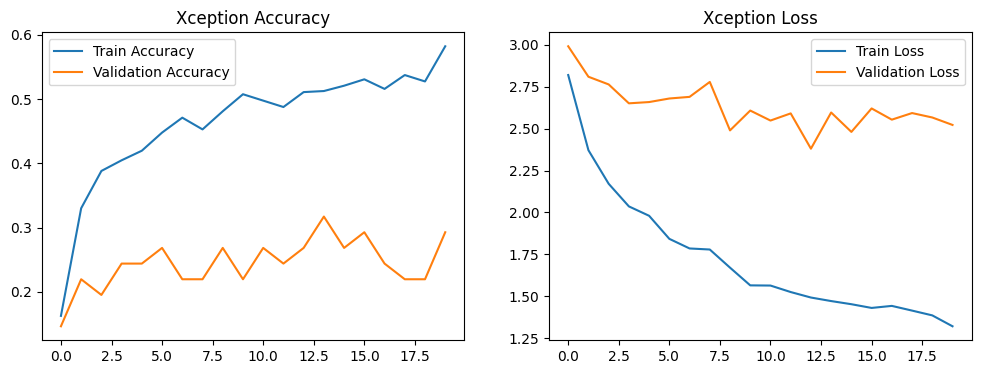

In [8]:
# base_model_xception = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
# base_model_xception.trainable = False

# model_xception = models.Sequential([
#     base_model_xception,
#     layers.GlobalAveragePooling2D(),
#     layers.Dense(1024, activation='relu'),
#     layers.Dense(1, activation='sigmoid')
# ])

# model_xception.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

xception_base = Xception(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
xception_base.trainable = False
xception_model = build_transfer_model(xception_base, num_classes)
xception_model.compile(optimizer=Adam(LEARNING_RATE), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_xception = xception_model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)
xception_model.save("xception_virus_classification.h5")

# history_xception = xception_model.fit(
#     train_generator,
#     epochs=10,
#     validation_data=test_generator
# )
plot_metrics(history_xception, "Xception")

# Fine-Tuning Xception

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2773 - loss: 2.4332

c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 73s 5s/step - accuracy: 0.2782 - loss: 2.4300 - val_accuracy: 0.3651 - val_loss: 2.0510
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.3766 - loss: 1.9986 - val_accuracy: 0.3730 - val_loss: 2.0879
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.4176 - loss: 1.9011 - val_accuracy: 0.3452 - val_loss: 2.1494
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.4732 - loss: 1.5691 - val_accuracy: 0.3849 - val_loss: 2.0311
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.5556 - loss: 1.3730 - val_accuracy: 0.4008 - val_loss: 2.0040
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.5486 - loss: 1.3001 - val_accuracy: 0.4008 - val_loss: 1.9635
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.5692 - loss: 1.3042 - val_accuracy: 0.3849 - val_loss: 1.9639
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.5896 - loss: 1.2275 - val_accuracy: 0.3730 - val_loss: 1.9852
Epo

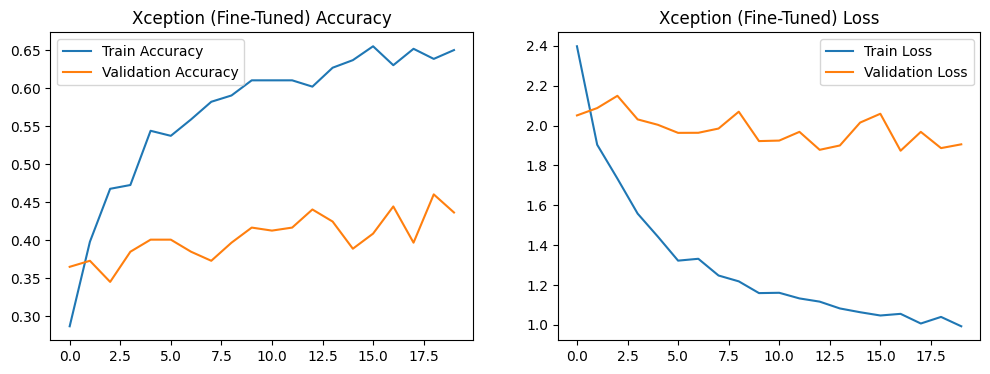

In [12]:
xception_base.trainable = True
xception_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_xception_fine = xception_model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)
plot_metrics(history_xception_fine, "Xception (Fine-Tuned)")

# DenseNet121

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.0945 - loss: 3.3741 - val_accuracy: 0.1707 - val_loss: 2.5027
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.2125 - loss: 2.5649 - val_accuracy: 0.2195 - val_loss: 2.4702
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.3424 - loss: 2.1648 - val_accuracy: 0.2195 - val_loss: 2.4067
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.4049 - loss: 1.9157 - val_accuracy: 0.3171 - val_loss: 2.2955
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.3544 - loss: 2.0140 - val_accuracy: 0.2927 - val_loss: 2.3444
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.4162 - loss: 1.9136 - val_accuracy: 0.2927 - val_loss: 2.3720
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.4560 - loss: 1.7860 - val_accuracy: 0.2439 - val_loss: 2.3966
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.4587 - loss: 1.6589 - val_accuracy: 0.3171 - val_loss:

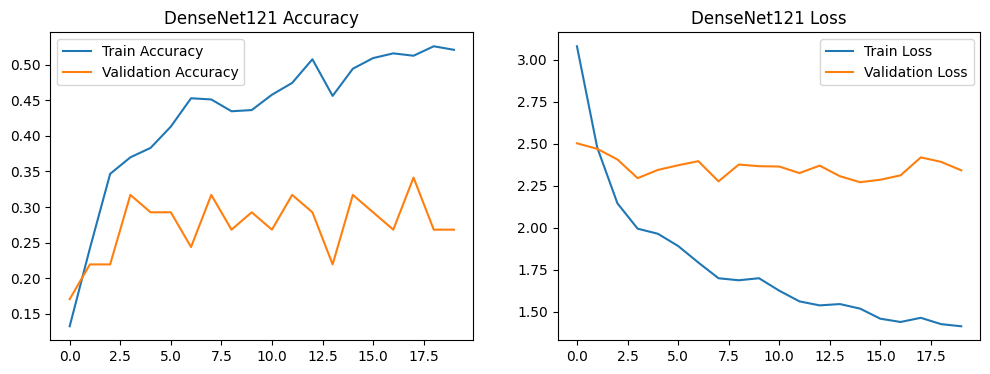

In [14]:
# base_model_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
# base_model_densenet.trainable = False

# model_densenet = models.Sequential([
#     base_model_densenet,
#     layers.GlobalAveragePooling2D(),
#     layers.Dense(1024, activation='relu'),
#     layers.Dense(1, activation='sigmoid')
# ])

# model_densenet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# history_densenet = model_densenet.fit(
#     train_generator,
#     epochs=10,
#     validation_data=test_generator
# )


densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
densenet_base.trainable = False
densenet_model = build_transfer_model(densenet_base, num_classes)
densenet_model.compile(optimizer=Adam(LEARNING_RATE), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_densenet = densenet_model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)
densenet_model.save("densenet121_virus_classification.h5")


plot_metrics(history_densenet, "DenseNet121")

# Fine-Tuning DenseNet

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 99s 5s/step - accuracy: 0.2362 - loss: 2.9168 - val_accuracy: 0.4127 - val_loss: 1.9415
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.3920 - loss: 1.9413 - val_accuracy: 0.3929 - val_loss: 2.1490
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.4661 - loss: 1.6301 - val_accuracy: 0.4167 - val_loss: 2.0937
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.5178 - loss: 1.4543 - val_accuracy: 0.4167 - val_loss: 2.0246
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.5101 - loss: 1.4519 - val_accuracy: 0.3413 - val_loss: 2.2313
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.5320 - loss: 1.4351 - val_accuracy: 0.3968 - val_loss: 2.3219
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.5441 - loss: 1.2857 - val_accuracy: 0.4087 - val_loss: 1.9749
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.5633 - loss: 1.2558 - val_accuracy: 0.3810 - val_loss:

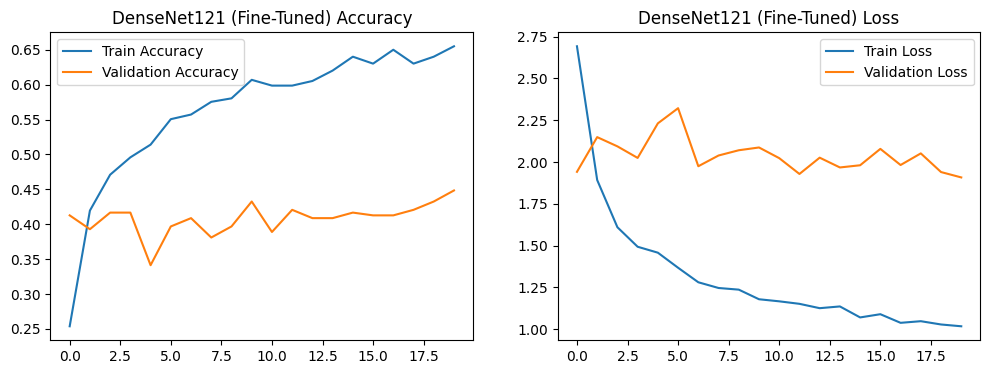

In [16]:
densenet_base.trainable = True
densenet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_densenet_fine = densenet_model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)
plot_metrics(history_densenet_fine, "DenseNet121 (Fine-Tuned)")

#  Train  ResNet Model
#  ======> Bottleneck Block Function

In [17]:
def bottleneck_block(x, filters, stride=1):
    shortcut = x
    x = layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, kernel_size=3, strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters * 4, kernel_size=1, strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    if stride != 1 or shortcut.shape[-1] != filters * 4:
        shortcut = layers.Conv2D(filters * 4, kernel_size=1, strides=stride, use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)
    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)
    return x

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.0810 - loss: 5.2127 - val_accuracy: 0.1220 - val_loss: 3.5444
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.1407 - loss: 3.5873 - val_accuracy: 0.0488 - val_loss: 4.5391
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.2180 - loss: 2.8218 - val_accuracy: 0.0244 - val_loss: 3.1648
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.2487 - loss: 2.4015 - val_accuracy: 0.0244 - val_loss: 3.2230
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.2759 - loss: 2.3265 - val_accuracy: 0.0244 - val_loss: 3.2221
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.3186 - loss: 2.1648 - val_accuracy: 0.0244 - val_loss: 3.3080
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.3226 - loss: 2.0992 - val_accuracy: 0.0976 - val_loss: 3.7388
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.2788 - loss: 2.1849 - val_accuracy: 0.0244 - val_loss:

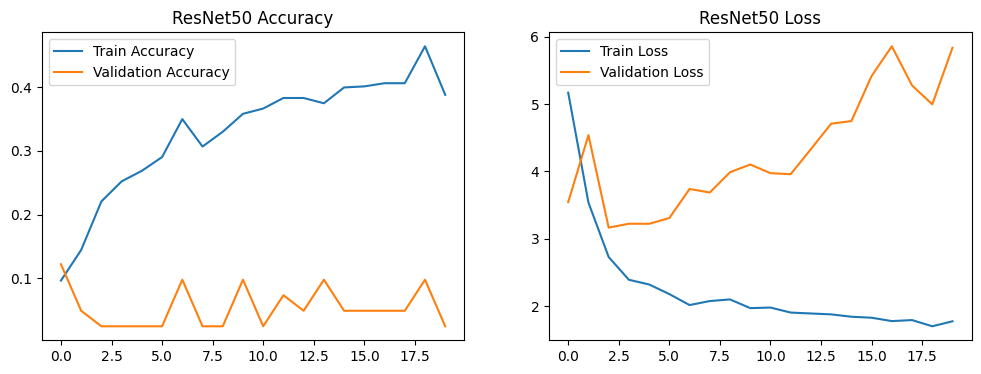

In [19]:
# model_resnet = models.Sequential([
#     layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(512, activation='relu'),
#     layers.Dense(1, activation='sigmoid')
# ])

# model_resnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# history_resnet = model_resnet.fit(
#     train_generator,
#     epochs=10,
#     validation_data=test_generator
# )


def build_resnet50(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, kernel_size=7, strides=2, padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
    x = bottleneck_block(x, 64, stride=1)
    x = bottleneck_block(x, 64, stride=1)
    x = bottleneck_block(x, 64, stride=1)
    x = bottleneck_block(x, 128, stride=2)
    x = bottleneck_block(x, 128, stride=1)
    x = bottleneck_block(x, 128, stride=1)
    x = bottleneck_block(x, 128, stride=1)
    x = bottleneck_block(x, 256, stride=2)
    x = bottleneck_block(x, 256, stride=1)
    x = bottleneck_block(x, 256, stride=1)
    x = bottleneck_block(x, 256, stride=1)
    x = bottleneck_block(x, 256, stride=1)
    x = bottleneck_block(x, 256, stride=1)
    x = bottleneck_block(x, 512, stride=2)
    x = bottleneck_block(x, 512, stride=1)
    x = bottleneck_block(x, 512, stride=1)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs, outputs)
    return model

resnet_model = build_resnet50((IMG_HEIGHT, IMG_WIDTH, 3), num_classes)
resnet_model.compile(optimizer=Adam(LEARNING_RATE), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train ResNet
history_resnet = resnet_model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)
resnet_model.save("resnet50_virus_classification.h5")

plot_metrics(history_resnet, "ResNet50")

# Evaluation Functions

In [24]:
def evaluate_model(model, test_generator, model_name):
    y_true = test_generator.classes  # Actual labels
    y_pred = model.predict(test_generator)  # Predicted probabilities
    
    # Classification Report
    y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_true, y_pred_classes))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(),
                yticklabels=test_generator.class_indices.keys())
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    # ROC Curve and AUC (Binary or Multiclass)
    n_classes = y_pred.shape[1]  # Number of classes
    y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))  # Binarize the labels

    plt.figure(figsize=(12, 10))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {i} ROC curve (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Evaluate All Models

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step

Classification Report for ResNet50:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        10
           4       0.03      1.00      0.06         7
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00        21
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00        19
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00        11
          14       0.00      0.00      0.00        13
          15       0.00      0.00      0.00         6
        

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


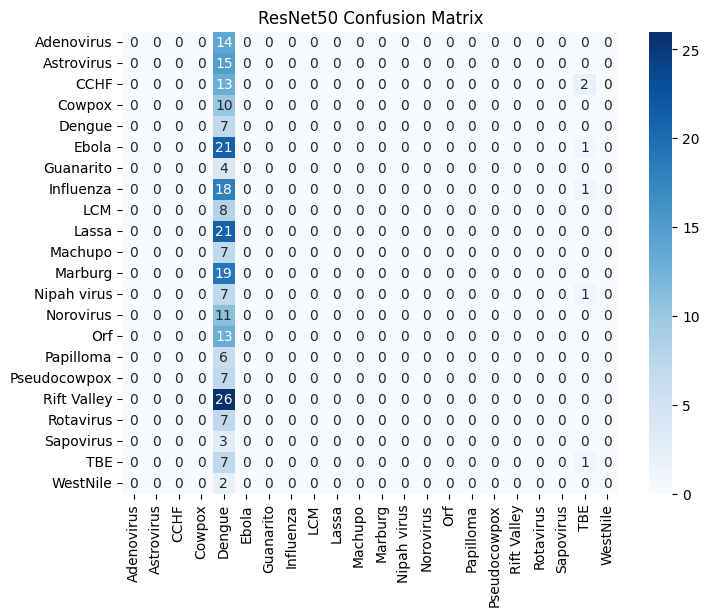

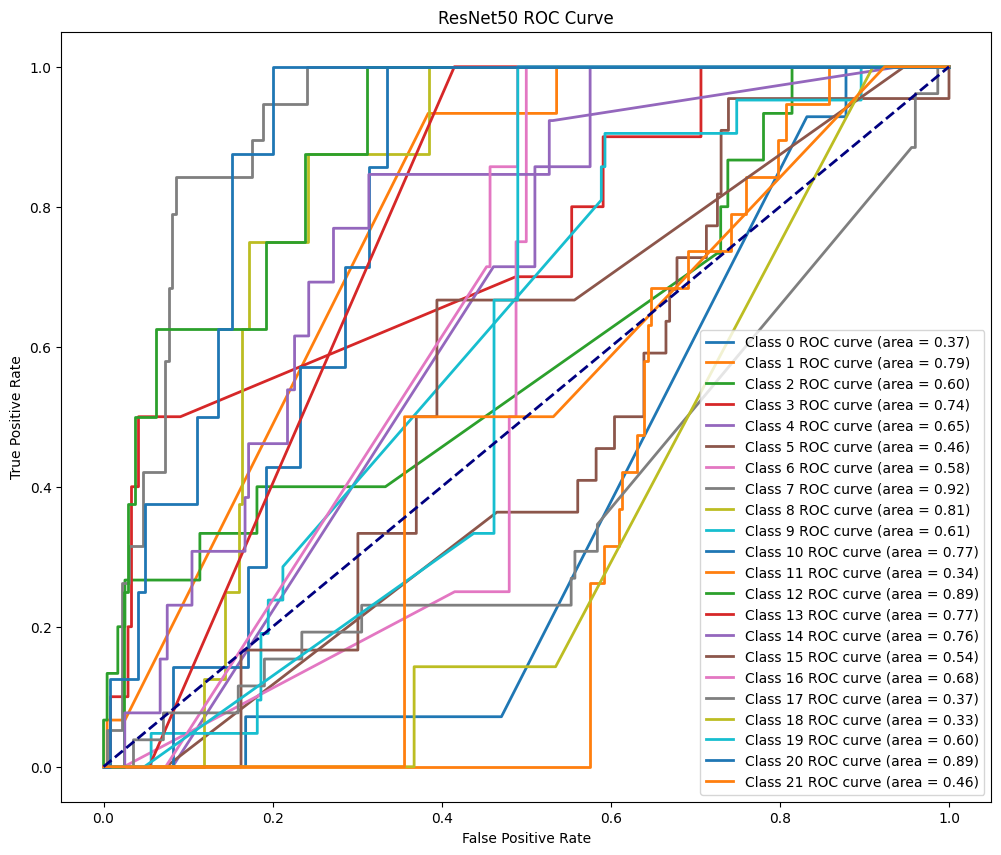

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step

Classification Report for Xception:
              precision    recall  f1-score   support

           0       0.50      0.07      0.12        14
           1       0.33      0.07      0.11        15
           2       0.41      0.47      0.44        15
           3       1.00      0.50      0.67        10
           4       0.00      0.00      0.00         7
           5       0.65      0.50      0.56        22
           6       1.00      0.50      0.67         4
           7       0.84      0.84      0.84        19
           8       0.64      0.88      0.74         8
           9       0.14      0.76      0.24        21
          10       0.67      0.57      0.62         7
          11       0.82      0.74      0.78        19
          12       0.67      0.50      0.57         8
          13       0.00      0.00      0.00        11
          14       0.83      0.77      0.80        13
          15       1.00      0.50      0.67         6
        

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


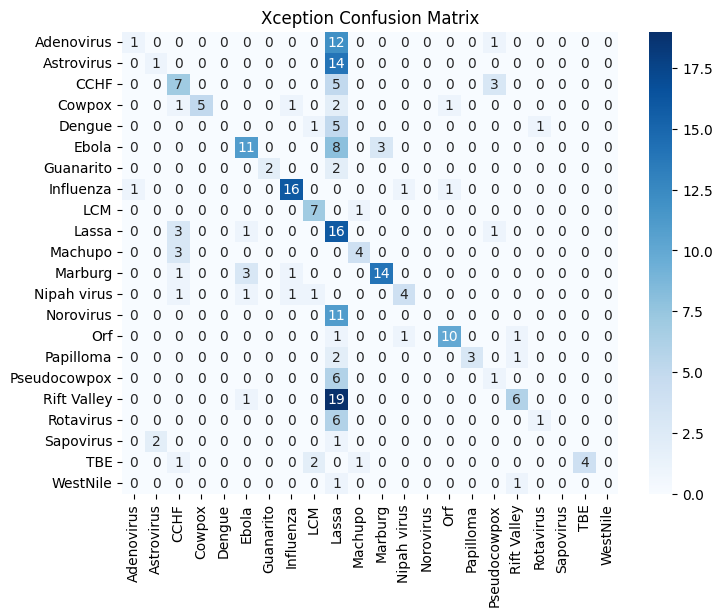

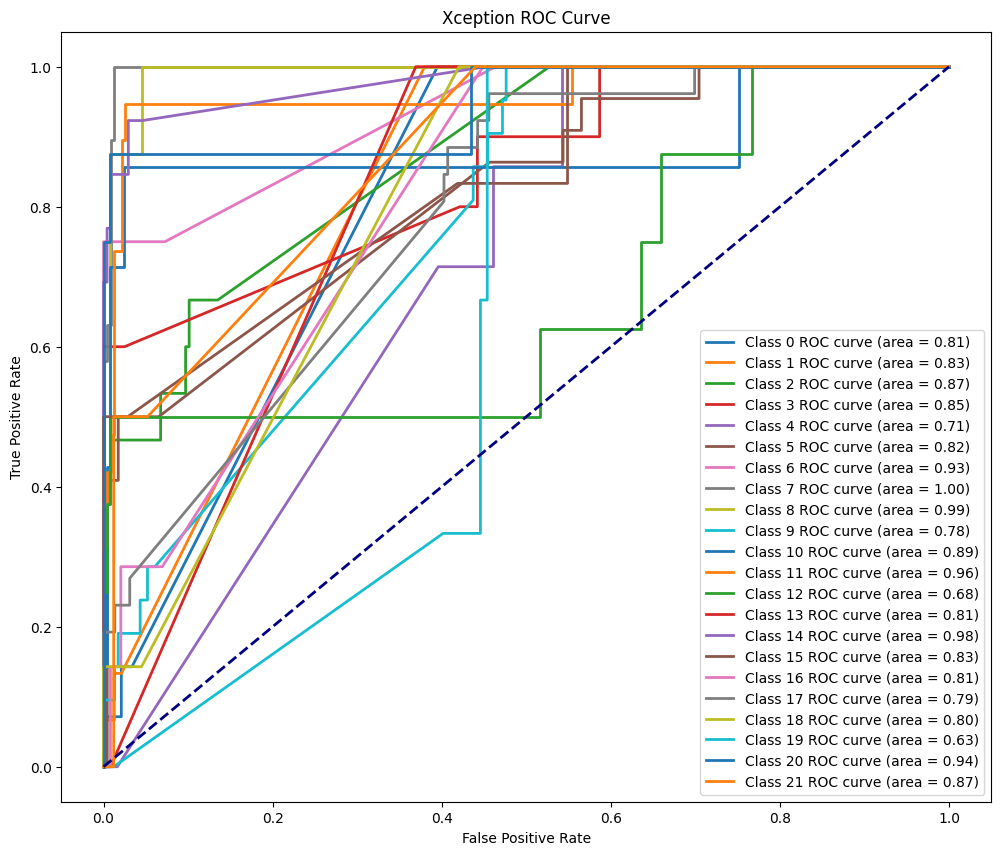

3/4 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/stepWARNING:tensorflow:5 out of the last 17 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000020A3D2F6B60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step

Classification Report for DenseNet121:
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        14
           1       0.13      0.93      0.23        15
           2       0.55      0.40      0.46        15
           3       1.00      0.60      0.75        10
           4       0.00      0.00      0.00         7
           5       0.73      0.36      0.48        22
           6       1.00      0.50      0.67         4
           7       0.95      0.95      0.95        19
           8       1.00      0.38      0.55         8
           9       0.55      0.29      0.38        21
          10       0.36      0.71      0.48         7
          11       0.70      0.74      0.72        19
          12       0.50      0.38      0.43         8
          13       0.00      0.00      0.00        11
          14       0.69      0.85      0.76        13
          15       0.60      0.50      0.55         6
    

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


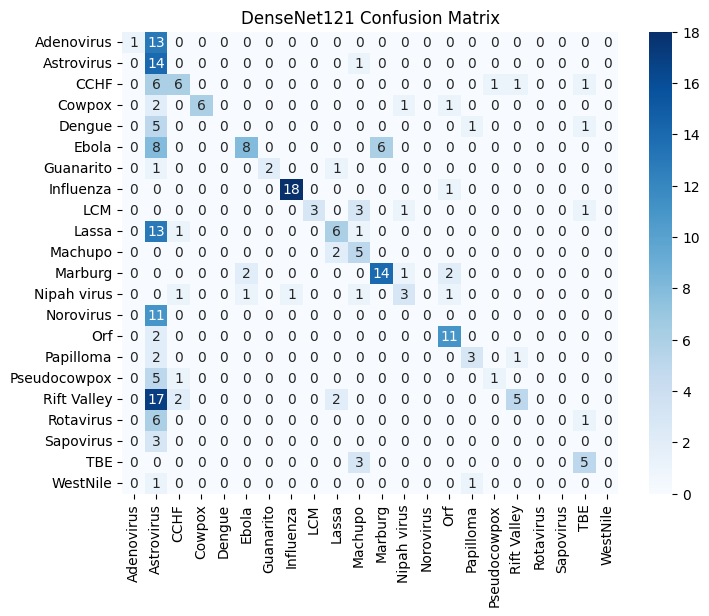

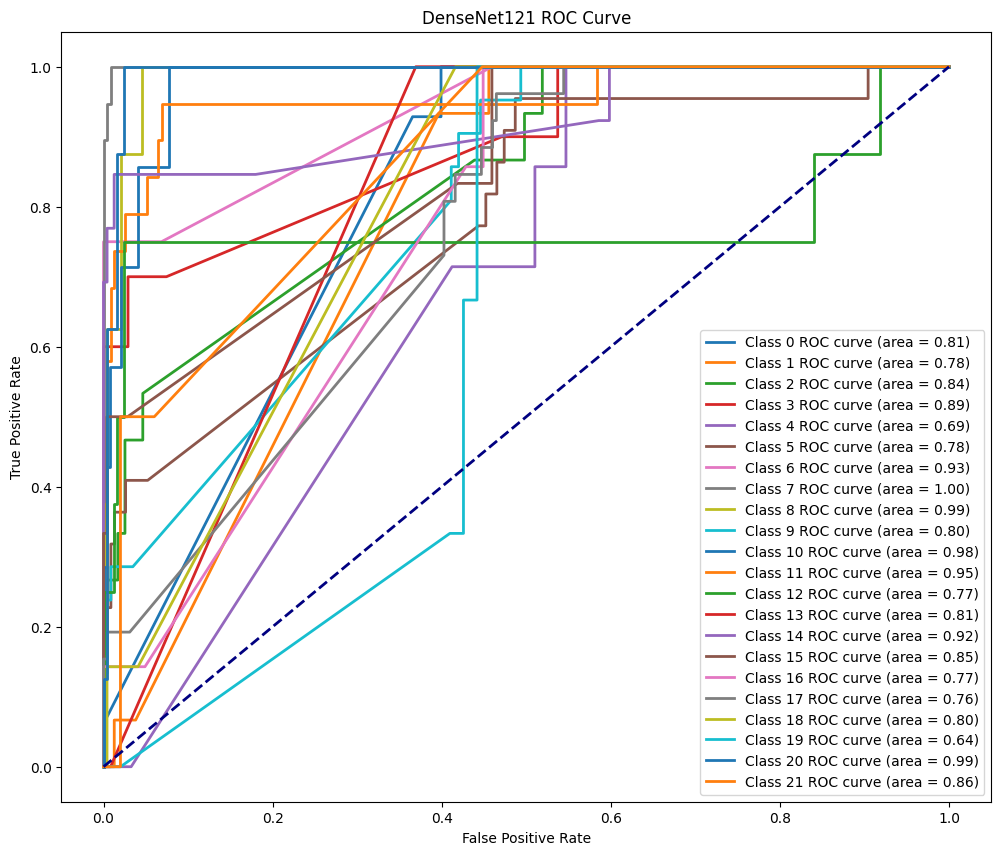

In [27]:
evaluate_model(resnet_model, test_generator, "ResNet50")
evaluate_model(xception_model, test_generator, "Xception")
evaluate_model(densenet_model, test_generator, "DenseNet121")